## Assignment 4 - 911 Call Analysis

Use Python to answer the following questions about the data. 

#### 1. Import required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

 #### 2. Read 911.csv provided to you on Moodle as a data frame

In [4]:
df = pd.read_csv('911.csv')

#### 3. Display first 10 records of this data set

In [ ]:
df.head(10)

#### 4. How many records does the file contain?  (you may use a property of the dataframe that will show this inormation)

In [ ]:
df.info()

#### 5. What are the top 10 towns with most 911 calls? (twp column)

In [8]:
df['twp'].value_counts().head(10)

LOWER MERION        36441
ABINGTON            25835
NORRISTOWN          23883
UPPER MERION        22694
CHELTENHAM          19629
POTTSTOWN           17500
UPPER MORELAND      14707
LOWER PROVIDENCE    14025
PLYMOUTH            12800
UPPER DUBLIN        11910
Name: twp, dtype: int64

#### 6. What are the top 10 zipcodes with most 911 calls?

In [10]:
df['zip'].value_counts().head(10)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
19002.0    13380
19468.0    12393
19046.0    11720
19454.0    11457
19090.0    11149
Name: zip, dtype: int64

## Creating new features

#### 7. Create a new column called "CallType". Content of this new column is derived from the title column. Each title is prefixed with the call type.  

##### For example, if the title column value is EMS: BACK PAINS/INJURY , the call type column value would be EMS. **

In [11]:
df['CallType'] = df['title'].apply(lambda title: title.split(':')[0])

#### 8. What is the number of calls for each call type. (How many calls per each call type)

In [42]:
df['CallType'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: CallType, dtype: int64

#### 9. Create a countplot of CallType

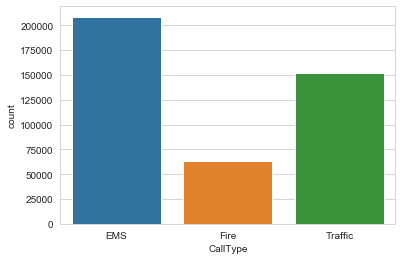

In [15]:
sns.countplot(x='CallType',data=df)

#### 10. use pandas to_datetime to convert the timestamp column from string data type to timestamp

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

#### 11. Create new columns to represent "Hour" from the timeStamp column. Now that you converted the data type of that column to timestamp, you can access hour by using df['timeStamp'].iloc[0].hour

you can use apply and lambda function to extract this information from the timeStamp column and create the new columns



In [21]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)



#### 12. Create new columns to represent "Month" from the timeStamp column. Now that you converted the data type of that column to timestamp, you can access month by using df['timeStamp'].iloc[0].Month

In [26]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

#### 13. Create new columns to represent "Day of Week" from the timeStamp column. Now that you converted the data type of that column to timestamp, you can access day of week by using df['timeStamp'].iloc[0].dayofweek

Note that the Day of Week will be an integer 0-6 with 0 represnting Monday 


In [22]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

#### 14. use seaborn to create a count plot for "Day of Week" column categorized by the callType.

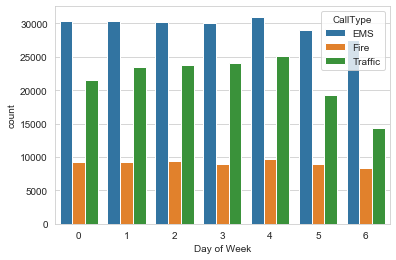

In [28]:
sns.countplot(x='Day of Week',data=df,hue='CallType')

#### 15. use seaborn to create a count plot for "Month" column categorized by the callType.

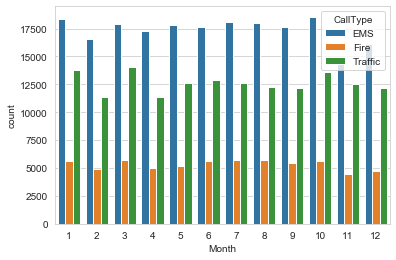

In [29]:
sns.countplot(x='Month',data=df,hue='CallType')



#### 16. Create a plot that shows number of calls per month

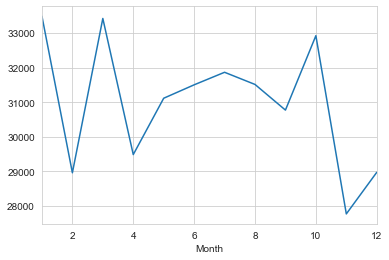

In [33]:
byMonth = df.groupby('Month').count()
byMonth['zip'].plot()

#### 17. Create a plot that displays the number of calls per month for EMS call type

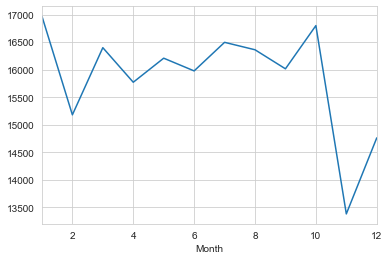

In [35]:
df[df['CallType']=='EMS'].groupby('Month').count()['zip'].plot()


#### 18. Create a plot that displays the number of calls per month for Traffic call type

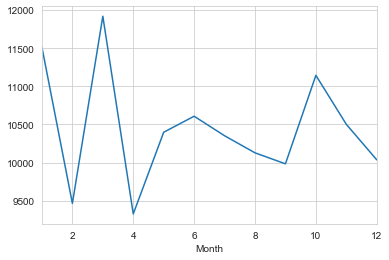

In [36]:
df[df['CallType']=='Traffic'].groupby('Month').count()['zip'].plot()


#### 19. Display plot from questions 17 and 18 next to each other. (1 row, 2 columns)

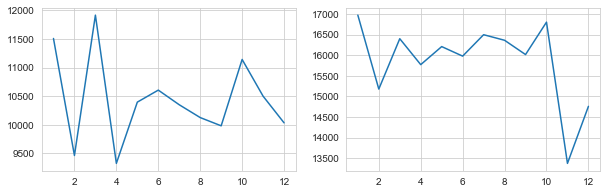

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(df[df['CallType']=='Traffic'].groupby('Month').count()['zip'])
axes[1].plot(df[df['CallType']=='EMS'].groupby('Month').count()['zip'])